# Working with Time Series Data: Exercises
> For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.  
 
> For this exercise you'll need to install a library that will provide us access to some more datasets: `pip install vega_datasets` 


> You can use this library like so:
        
        from vega_datasets import data
        data.sf_temps()

# Import 

In [1]:
import numpy as np
import pandas as pd

from vega_datasets import data

## Use the above (`sf_temps`) dataset for the exercises below:



In [2]:
# assign imported data
sf_temps = data.sf_temps()

In [4]:
#verify data and begin initial familiarization
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
#
sf_temps.describe()

,temp
count,8759.000000
mean,56.924112
std,6.107079
min,45.600000
25%,52.300000
50%,56.500000
75%,60.700000
max,72.200000


In [6]:
sf_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## Resample by the day and take the average temperature. 

In [8]:
#first set date to index in
sf_temps = sf_temps.set_index('date')

In [12]:
# resample and take the average temperature
sf_temps.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


## Visualize the average temperature over time.



<AxesSubplot:xlabel='date'>

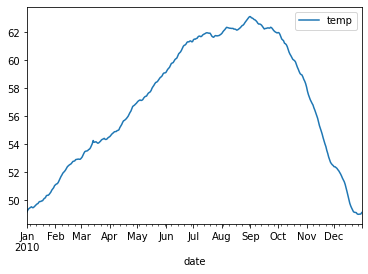

In [13]:
#resample with days and view plot of average daily temperatures 
sf_temps.resample('D').mean().plot()

## Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

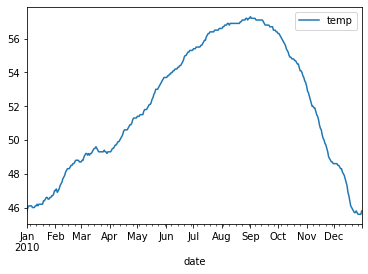

In [14]:
#resample by day, and view minimum daily tempture plot
sf_temps.resample('D').min().plot()

## Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

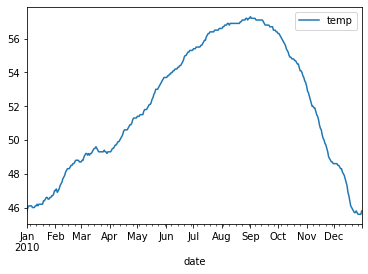

In [15]:
#resample by day, and view maximum daily tempture plot
sf_temps.resample('D').min().plot()

## Which month is the coldest, on average?
* January

In [20]:
#resample by month, take average temp, sort values 
sf_temps.resample('M').mean().sort_values('temp')

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


## Which month has the highest average temperature?
* September

In [21]:
#resample by month, take average temp, sort values 
sf_temps.resample('M').mean().sort_values('temp', ascending=False)

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


## Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 


In [25]:
sf_temps.resample('D').agg(['min', 'max'])

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [28]:
df = sf_temps.resample('D').agg(['min', 'max'])

## Use this resampled dataframe to calculate the change in temperature for the day


In [29]:
df['temp_change'] = df['temp']['max'] - df['temp']['min']

In [31]:
df.head()

temp       temp_change
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4
2010-01-04  46.1  53.6         7.5
2010-01-05  46.1  53.8         7.7

## Which month has the highest daily temperature variability?
* September


In [34]:
df.resample('M').mean().sort_values('temp_change', ascending=False)

temp            temp_change
                  min        max            
date                                        
2010-09-30  56.903333  71.306667   14.403333
2010-07-31  56.045161  70.022581   13.977419
2010-06-30  54.480000  68.430000   13.950000
2010-08-31  56.941935  70.812903   13.870968
2010-10-31  54.932258  68.364516   13.432258
2010-05-31  52.403226  65.312903   12.909677
2010-04-30  50.326667  62.646667   12.320000
2010-03-31  49.238710  60.093548   10.854839
2010-11-30  50.776667  61.013333   10.236667
2010-02-28  48.064286  57.550000    9.485714
2010-01-31  46.309677  54.651613    8.341935
2010-12-31  47.025806  54.951613    7.925806

#  Bonus:

## Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

from vega_datasets import data
data.seattle_weather()
Use the dataset to answer the following questions:

Which year and month combination has the highest amount of precipitation?
Visualize the amount of monthly precipitation over time.
Visualize the amount of wind over time. Choose a time interval you think is appropriate.
Which year-month combination is the windiest?
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
In which month does it rain the most?
Which month has the most number of days with a non-zero amount of precipitation?

data.flights_20k()
Convert any negative delays to 0.
Which hour of the day has the highest average delay?
Does the day of the week make a difference in the delay amount?
Does the month make a difference in the delay amount?